<a href="https://colab.research.google.com/github/aydawudu/Machine-Learning-Course/blob/main/Building_A_Good_Dataset_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
#eliminate rows missing values
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [4]:
#eliminate columns with missing values
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [5]:
#only drop rows when all columns are Nan
df.dropna(how="all")

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
#drop rows that have fewer than 4 real values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### Imputing Missing Values

In [8]:
#use sklean SimpleImputer to impute missing values
from sklearn.impute import SimpleImputer
import numpy as np

imr=SimpleImputer(missing_values=np.nan, strategy='mean')
imr=imr.fit(df.values)
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [9]:
#use pandas to impute missing value use fillna
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Handling Categorical Data

In [10]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


- color is norminal
- size is ordinal
- price is numerical
- classlabel is the target colomn



In [11]:
## Mapping the ordinal featurs
size_mapping={'XL':3,
              'L':2,
              'M':1}

In [12]:
df['size']=df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [13]:
#if you want to reverse transform the mapping
inv_size_mapping={v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

### Encoding class labels

In [14]:
import numpy as np
#create a mapping dict
#to convert class labels from strings to integers, remember they are not ordinal
class_mapping={label: idx for idx, label in enumerate (np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [15]:
#use the mapping dictionary to convert class labels from strings to integres
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [16]:
#reverse the class label mapping
inv_class_mapping={v: k for k, v in class_mapping.items()}
df['classlabel']=df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [17]:
#Alternatively, use LabelEncoder class in sklearn
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
y=class_le.fit_transform(df['classlabel'].values) #does fit and transform
y

array([1, 0, 1])

In [18]:
#reverse mapping
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

### Performing one-hot encoding on norminal features

In [19]:
#since the color is not ordinal we can also use LabelEncoder to encode the feature
X=df[['color', 'size', 'price']].values
color_le=LabelEncoder()
X[:, 0]=color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

- blue = 0
- green = 1
- red = 2

The problem with this is that the model will think 2 is greater than 1 and 1 is greater than 0 for the color using OneHotEnder is optimal

In [20]:
#Using OneHotEncoder for a single column
from sklearn.preprocessing import OneHotEncoder
X=df[['color', 'size', 'price']].values
color_ohe=OneHotEncoder()
color_ohe.fit_transform(X[: , 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [21]:
#OnrHotEndoding for multi-features
from sklearn.compose import ColumnTransformer
X=df[['color', 'size', 'price']].values
c_transform=ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                             ('nothing', 'passthrough', [1,2])])
c_transform.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [22]:
# Another convenient option of using one hot encodng is using get_dummies method from pandas
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [23]:
#multicollinearity guard in get_dummies
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [24]:
# multicollinearity guard for the OneHotEncoder
color_ohe=OneHotEncoder(categories='auto', drop='first')
c_transform=ColumnTransformer([ ('onehot', color_ohe, [0]),
                                ('nothing', 'passthrough', [1, 2])])
c_transform.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

### Optional Encoding Ordinal Features

In [25]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


If we are unsure about the numerical differences between the categories of ordinal features, or the difference between two ordinal values is not defined, we can also encode them using a threshold encoding with 0/1 values. For example, we can split the feature "size" with values M, L, and XL into two new features "x > M" and "x > L". Let's consider the original DataFrame:

In [26]:
df['x > M']=df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L']=df['size'].apply(lambda x: 1 if x =='XL' else 0)
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


## Partitioning a dataset into a separate training and test set

In [27]:
#getting the data
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

In [28]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
# Partioning data using sklearn
from sklearn.model_selection import train_test_split

X, y=df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

###  Bringing features onto the same scale

Two ways: Normalization and Standardization
- Normilization: Rescaling the features to a range [0, 1]. Min-max scaling often use
- Standardization: centers the features at mean 0 standard deviation of 1 so that the feature columns have the same parameters as a standard normal deviation though it doesn't change the distribution. It also maintain useful information about outliers

In [30]:
#Min_max scaling procedure in sklearn
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.transform(X_test)

In [31]:
#standardization procedure with sklearn
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.transform(X_test)

### Selecting meaningful features

L1 and L2 regularization as penalties against model complexity so that the model can generalize better on new dataset

In [32]:
#L1 regulation using sklearn
from sklearn.linear_model import LogisticRegression
LogisticRegression( penalty='l1',
                    solver='liblinear',
                    multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [33]:
#let apply to the standardized Wine data ...
lr=LogisticRegression(penalty='l1',
                      C=1.0,
                      solver='liblinear',
                      multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))

Training accuracy:  1.0
Test accuracy:  1.0


In [34]:
lr.intercept_

array([-1.26358127, -1.21597141, -2.37114599])

In [35]:
lr.coef_

array([[ 1.24566692,  0.18027443,  0.74629687, -1.1636683 ,  0.        ,
         0.        ,  1.16042509,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55624044,  2.50887941],
       [-1.537449  , -0.38698121, -0.99535581,  0.36467259, -0.05928557,
         0.        ,  0.66794938,  0.        ,  0.        , -1.93378683,
         1.23443703,  0.        , -2.23236419],
       [ 0.13511917,  0.16966557,  0.35742492,  0.        ,  0.        ,
         0.        , -2.4343785 ,  0.        ,  0.        ,  1.56256159,
        -0.81674081, -0.49688615,  0.        ]])

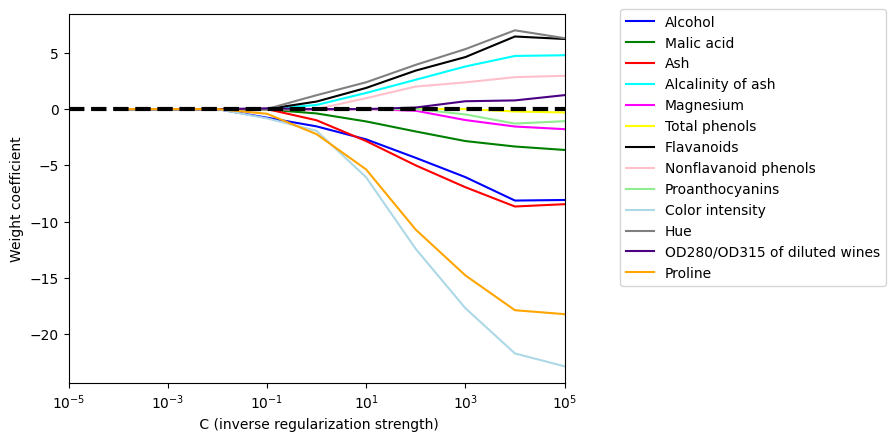

In [36]:
#Plot the regulization path
import matplotlib.pyplot as plt

fig=plt.figure()
ax=plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [] , []
for c in np.arange(-4., 6.):
  lr=LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',
                        multi_class='ovr', random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights=np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column],
           label=df_wine.columns[column+1],
           color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel(' C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc="upper left")
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

### Sequential feature selection algorithms

In [39]:
##Implementing the sequential feature selection from scratch
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
  def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
    self.scoring=scoring
    self.estimator=clone(estimator)
    self.k_features=k_features
    self.test_size=test_size
    self.random_state=random_state

  def fit(self, X, y):
    X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                       test_size=self.test_size,
                                                       random_state=self.random_state)
    dim=X_train.shape[1]
    self.indices_ =tuple(range(dim))
    self.subsets_=[self.indices_]
    score=self._calc_score(X_train, y_train, X_test, y_test, self.indices_)

    self.scores_=[score]

    while dim > self.k_features:
      scores=[]
      subsets=[]

      for p in combinations(self.indices_, r=dim -1 ):
        score=self._calc_score(X_train, y_train, X_test, y_test, p)

        scores.append(score)
        subsets.append(p)

      best =np.argmax(scores)
      self.indices_=subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1

      self.scores_.append(scores[best])
    self.k_score_=self.scores_[-1]

    return self

  def transform(self, X):
    return X[:, self.indices_]

  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred=self.estimator.predict(X_test[:, indices])
    score=self.scoring(y_test, y_pred)
    return score

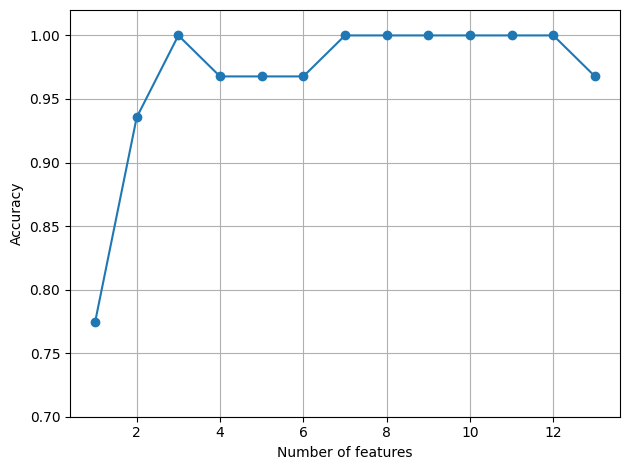

In [41]:
#lets use SBS
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)

#selecting features
sbs=SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

#plotting performance of feature subsets
k_feat =[len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

In [47]:
#let's check out the smallest feature subset
k3=list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [48]:
#let's evaluate the performance on the original dataset
knn.fit(X_train_std, y_train)
print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Test accuracy: ', knn.score(X_test_std, y_test))

Training accuracy:  0.967741935483871
Test accuracy:  0.9629629629629629


In [49]:
#let's evaluate the performance on the three feature subset
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[: , k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


### Assessing feature importance with Random Forests

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


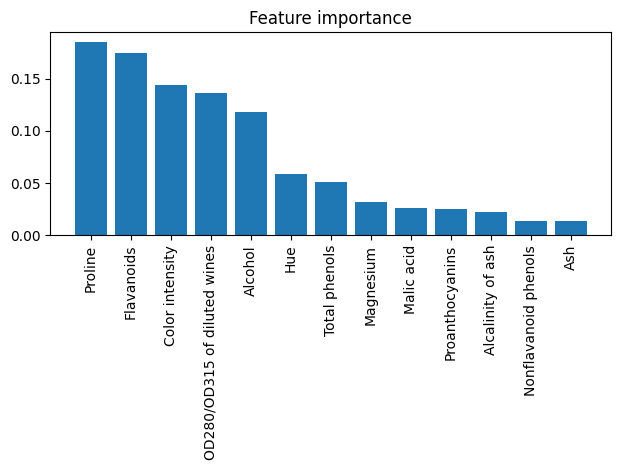

In [52]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

In [54]:
#reducing the dataset to the most important features
from sklearn.feature_selection import SelectFromModel

sfm=SelectFromModel(forest, threshold=0.1, prefit=True) #select features where importance is greater than or equal to one
X_selected=sfm.transform(X_train)
print('Number of features that meet this threshold criterion:',
      X_selected.shape[1])


Number of features that meet this threshold criterion: 5


In [55]:
#let's print the selected features
for f in range(X_selected.shape[1]):
  print("%2d) %-*s %f" % (f +1, 30,
                         feat_labels[indices[f]],
                         importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
